# Imports

In [626]:
pip install visualize

You should consider upgrading via the 'C:\Users\marcj\anaconda3\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for visualize: filename=visualize-0.5.1-py3-none-any.whl size=11479 sha256=e0a375940bcdc6a63c709849a7c1b1326b1de2e8b0c5dd8a5066bfae6054e56f
  Stored in directory: c:\users\marcj\appdata\local\pip\cache\wheels\9d\06\26\944128c987db913298520c2b476bb652faf6a5d00accb3f59c
Successfully built visualize


In [1]:
#%pip install simple_image_download
#%pip install pokemontcgsdk
#%pip install opencv-python
from pokemontcgsdk import Card
from simple_image_download import simple_image_download as simp
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import shutil 
import random
import tensorflow as tf
import cv2
from sklearn.metrics import confusion_matrix
#from visualize import plot_confusion_matrix
from sklearn.metrics import classification_report
import urllib.request
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception
from tensorflow.keras.callbacks import EarlyStopping

# Problem Statement

When I was young I was a fan of the show Pokemon. Pokemon cards cards are fun to collect and can even be a good investment as some rare cards sell for thousands of dollars. I'm want to find the best way for someone to upload their pokemon card collection online. This could be a fast way to  record someone's collection, or even be made compatible with a Pokemon computer game. The goal of my project is to find a way for card collectors to link their collection with their online accounts or just to store their cards electronically. Typing in Pokemonnames on a phone or table can be cumbersome and the ability to scan an image of a card to find out how much it is worth would be very useful to players and collectors. This is also a good opportunity to learn how Nueral Networks best learn patterns to classify images.

# Data Gathering 

In [57]:
# Use Pokemon Traing Card Game (TCG) API fo find and store all card information containing the name "pikachu"
pika_cards = Card.where(q='name:pikachu')

In [58]:
# This created a list of data that include links to pictures online from the Pokemon TCG
pika_cards[0].images.small

'https://images.pokemontcg.io/basep/1.png'

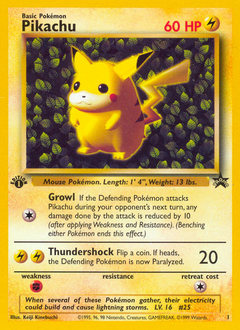

In [59]:
# Will use a request to pull the card informaton and save it in python
response1 = requests.get(pika_cards[0].images.small)
img1 = Image.open(BytesIO(response1.content))
img1

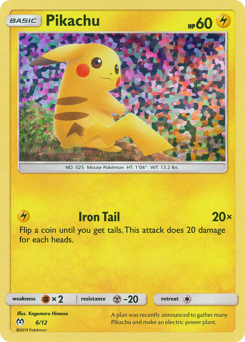

In [43]:
#Each item on the list corresponds to a different version of pikachu from the TCG
pika_cards[1].images.small
response2 = requests.get(pika_cards[1].images.small)
img2 = Image.open(BytesIO(response2.content))
img2

In [149]:
# This searches for and saves card data containing the name "squirtle"
squirtle_cards = Card.where(q='name:squirtle')

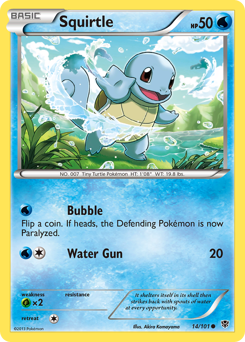

In [150]:
# Just like with Pikachu we can request and pull in the image data for the squirtle cards.
sq_response1 = requests.get(squirtle_cards[0].images.small)
sq_img1 = Image.open(BytesIO(sq_response1.content))
sq_img1

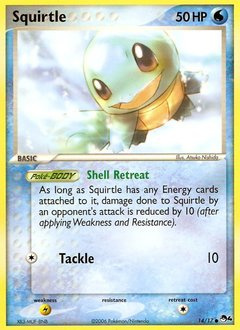

In [51]:
sq_response2 = requests.get(squirtle_cards[1].images.small)
sq_img2 = Image.open(BytesIO(sq_response2.content))
sq_img2

from https://www.reddit.com/r/pokemon/comments/1qrnw8/i_made_a_few_plain_text_printer_friendly_pokemon/  I obtained a Pokemon excel file with names, types and pokedex numbers

In [2]:
df_poke = pd.read_csv('../Data/Pokemon List by Name - Sheet1.csv', names=['Name', 'Number', 'Type_1', 'Type_2'])
df_poke.head()

Name Number Type_1  Type_2
0   Bulbasaur   #001  Grass  Poison
1     Ivysaur   #002  Grass  Poison
2    Venusaur   #003  Grass  Poison
3  Charmander   #004   Fire     NaN
4  Charmeleon   #005   Fire     NaN

In [3]:
# remove last row as it doesn't contain useful information
df_poke = df_poke.iloc[:-1, :]

In [4]:
# remove # sign from pokexex numbers and convert to interger type
df_poke['Number'] = df_poke['Number'].str[2:].astype(int)

In [5]:
df_poke.tail()

Name  Number  Type_1  Type_2
713   Noibat     714  Flying  Dragon
714  Noivern     715  Flying  Dragon
715  Xerneas     716   Fairy     NaN
716  Yveltal     717    Dark  Flying
717  Zygarde     718  Dragon  Ground

In [7]:
# create dictionary of pokemon names and numbers
pokedict = {key:value for key,value in df_poke[['Number', 'Name']].iloc[:151, :].values}

In [45]:
pokedict

{1: 'Bulbasaur',
 2: 'Ivysaur',
 3: 'Venusaur',
 4: 'Charmander',
 5: 'Charmeleon',
 6: 'Charizard',
 7: 'Squirtle',
 8: 'Wartortle',
 9: 'Blastoise',
 10: 'Caterpie',
 11: 'Metapod',
 12: 'Butterfree',
 13: 'Weedle',
 14: 'Kakuna',
 15: 'Beedrill',
 16: 'Pidgey',
 17: 'Pidgeotto',
 18: 'Pidgeot',
 19: 'Rattata',
 20: 'Raticate',
 21: 'Spearow',
 22: 'Fearow',
 23: 'Ekans',
 24: 'Arbok',
 25: 'Pikachu',
 26: 'Raichu',
 27: 'Sandshrew',
 28: 'Sandslash',
 29: 'Nidoran♀',
 30: 'Nidorina',
 31: 'Nidoqueen',
 32: 'Nidoran♂',
 33: 'Nidorino',
 34: 'Nidoking',
 35: 'Clefairy',
 36: 'Clefable',
 37: 'Vulpix',
 38: 'Ninetales',
 39: 'Jigglypuff',
 40: 'Wigglytuff',
 41: 'Zubat',
 42: 'Golbat',
 43: 'Oddish',
 44: 'Gloom',
 45: 'Vileplume',
 46: 'Paras',
 47: 'Parasect',
 48: 'Venonat',
 49: 'Venomoth',
 50: 'Diglett',
 51: 'Dugtrio',
 52: 'Meowth',
 53: 'Persian',
 54: 'Psyduck',
 55: 'Golduck',
 56: 'Mankey',
 57: 'Primeape',
 58: 'Growlithe',
 59: 'Arcanine',
 60: 'Poliwag',
 61: 'Poliwhirl'

In [52]:
# Download 100 images for all pokemon 1 through 151.
for pkmn in list(pokedict.values()):
    response.download(response(), keywords=pkmn, limit=30)

[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[========================================================================] 100%
[=======================================

used other data set may not use pokedict or simple_image_download

create classes, train-set, and test-set

In [6]:
path = 'Data/PokemonData/Poke_train'
classes = os.listdir(path)

In [39]:
len(classes)

0

nidoran male/female are missing from kaggle dataset will use simplimages to add them

code to create train and test folders

In [57]:
mkdir -p Data\PokemonData\Poke_train

In [58]:
# Creating the train folder
os.system("mkdir Data\PokemonData\Poke_train")

1

In [64]:
# Creating the test folder
os.system("mkdir Data\\PokemonData\\Poke_test")

0

In [ ]:
"mv Data\PokemonData\* Data\PokemonData\Poke_train"sdfsdf

In [65]:
# Move all the folders from root folder to train folder, ignore the error
os.system("mv Data\\PokemonData\\* Data\\PokemonData\\Poke_train\\")

1

In [68]:
# Copying all the data from train to test to get the same folder structure
os.system("cp -r Data\\PokemonData\\Poke_train\\* Data\\PokemonData\\Poke_test\\")

1

In [69]:
os.system("find Data\PokemonData\Poke_test\ -name '*.*' -type f -delete")

0

In [70]:
train_path = 'Data\PokemonData\Poke_train'
test_path = 'Data\PokemonData\Poke_test'

In [75]:
# Copying 15 random images from train folders to test folders

def prep_test_data(pokemon,train_path,test_path):
    pop = os.listdir(train_path+'/'+pokemon)
    test_data = random.sample(pop,15)
    #print(test_data)
    
    for f in test_data:
        shutil.copy(train_path+'/'+pokemon+'/'+f,test_path+'/'+pokemon+'/')

In [78]:
# Performing the task for each folder in train folder
for poke in os.listdir(train_path):
    prep_test_data(poke,train_path, test_path)

In [79]:
# Creating an image genertaor to apply random transformation on the images
image_gen = ImageDataGenerator(rotation_range=20,
                               rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [80]:
image_gen.flow_from_directory(train_path)

Found 6850 images belonging to 151 classes.


In [81]:
image_gen.flow_from_directory(test_path)

Found 2258 images belonging to 151 classes.


In [83]:
image_shape = (256,256,3)

In [93]:
# Creating a CNN model with 5 layers 64,128,128,128 and 256 filters each with 3x3 kernel size and pooling layers with size 2
# Adding 3 dense layers with 1024,512 neurons with final layer with 150 outputs.
# Batch Normalization and Dropout layers

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(512,activation='relu'))
model.add(Dense(151,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)      

In [86]:
batch_size = 16

In [87]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 6850 images belonging to 151 classes.


In [91]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 2258 images belonging to 151 classes.


In [89]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [95]:
history = model.fit(train_image_gen, epochs=80, validation_data=test_image_gen, callbacks=[early_stopping])

Epoch 1/80
 43/429 [==>...........................] - ETA: 7:48 - loss: 7.4393 - accuracy: 0.0058

C:\Users\marcj\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


429/429 [==============================] - 588s 1s/step - loss: 5.2999 - accuracy: 0.0069 - val_loss: 5.0267 - val_accuracy: 0.0084
Epoch 2/80
429/429 [==============================] - 575s 1s/step - loss: 4.7256 - accuracy: 0.0226 - val_loss: 4.5262 - val_accuracy: 0.0354
Epoch 3/80
429/429 [==============================] - 557s 1s/step - loss: 4.2986 - accuracy: 0.0488 - val_loss: 4.8493 - val_accuracy: 0.0270
Epoch 4/80
429/429 [==============================] - 622s 1s/step - loss: 3.9912 - accuracy: 0.0812 - val_loss: 3.6973 - val_accuracy: 0.1138
Epoch 5/80
429/429 [==============================] - 569s 1s/step - loss: 3.6839 - accuracy: 0.1190 - val_loss: 3.3132 - val_accuracy: 0.1732
Epoch 6/80
429/429 [==============================] - 562s 1s/step - loss: 3.4504 - accuracy: 0.1677 - val_loss: 3.0961 - val_accuracy: 0.2108
Epoch 7/80
429/429 [==============================] - 563s 1s/step - loss: 3.2140 - accuracy: 0.2140 - val_loss: 3.0842 - val_accuracy: 0.2259
Epoch 8/80

In [96]:
model.save('poke_cnn_model.h5')

In [97]:
model.evaluate(test_image_gen)

142/142 [==============================] - 48s 333ms/step - loss: 1.7737 - accuracy: 0.5142


[1.7736930847167969, 0.514171838760376]

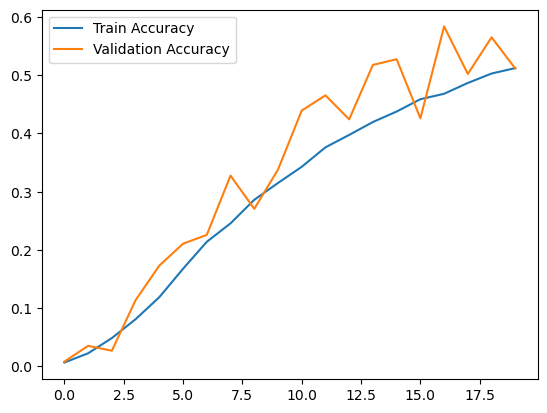

In [122]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

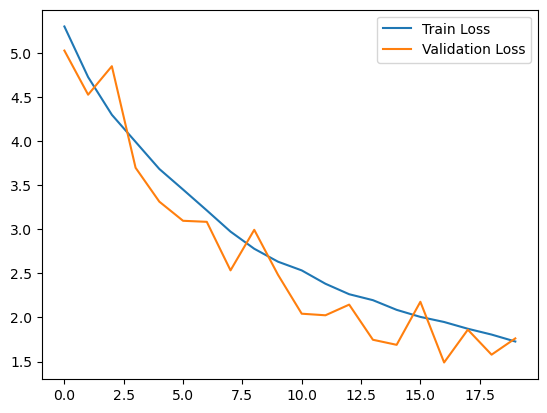

In [126]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [135]:
(np.array(pika_goog1.resize((256,256)))/255).reshape(-1, 256, 256, 1)

(256, 256, 3)

In [ ]:
x_train = np.array(x_train) / 255
x_train.reshape(-1, 256, 256, 1)

In [141]:
np.array(pika_goog1.resize((256,256)))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [138]:
model.predict((np.array(pika_goog1.resize((256,256)))/255).reshape(-1, 256, 256, 3))

array([[6.24178117e-03, 3.67222763e-09, 4.68554761e-04, 5.43277680e-11,
        4.70947043e-06, 1.07873745e-11, 1.53180245e-05, 4.77154827e-04,
        3.58747521e-09, 1.23745875e-10, 2.22389232e-13, 1.36182309e-04,
        1.11550925e-11, 2.70981582e-05, 1.86978013e-03, 7.82237120e-09,
        4.69304005e-11, 2.97904201e-10, 1.52612936e-10, 1.00284757e-04,
        1.64207126e-09, 5.51782136e-07, 9.73636844e-15, 1.14861090e-04,
        4.56464273e-04, 2.02890007e-07, 1.89154712e-03, 7.51133555e-08,
        1.76210306e-03, 6.85972850e-07, 2.53661401e-05, 7.47580344e-08,
        1.32130133e-03, 8.93999874e-11, 1.88222113e-08, 7.99635814e-07,
        6.05740570e-06, 1.31307897e-04, 1.80652156e-03, 5.07178292e-11,
        9.38555128e-14, 2.00029604e-06, 6.37565611e-10, 6.70311029e-11,
        1.66376676e-10, 2.63615849e-08, 9.28499219e-07, 1.79429200e-08,
        6.85835598e-14, 7.86508190e-06, 8.99842598e-06, 3.28455839e-12,
        2.69486065e-07, 2.52964082e-06, 3.34362539e-06, 3.549486

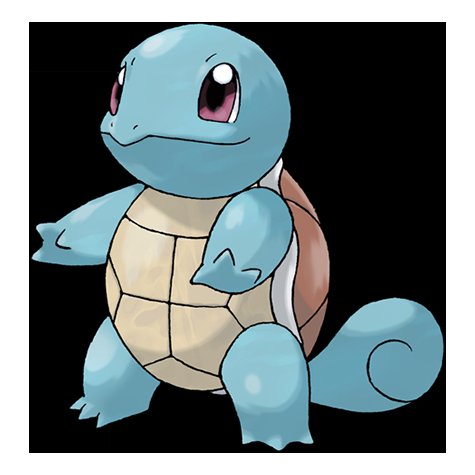

In [168]:
sqrtl_goog1

In [159]:
pred_class = np.argmax(model.predict((np.array(sqrtl_goog1.resize((256,256)))/255).reshape(-1, 256, 256, 3)),axis=-1)
poke_class = {value:key for key,value in train_image_gen.class_indices.items()}
print(poke_class[pred_class[0]])

Squirtle


103

In [142]:
train_image_gen.class_indices.items()

dict_items([('Abra', 0), ('Aerodactyl', 1), ('Alakazam', 2), ('Arbok', 3), ('Arcanine', 4), ('Articuno', 5), ('Beedrill', 6), ('Bellsprout', 7), ('Blastoise', 8), ('Bulbasaur', 9), ('Butterfree', 10), ('Caterpie', 11), ('Chansey', 12), ('Charizard', 13), ('Charmander', 14), ('Charmeleon', 15), ('Clefable', 16), ('Clefairy', 17), ('Cloyster', 18), ('Cubone', 19), ('Dewgong', 20), ('Diglett', 21), ('Ditto', 22), ('Dodrio', 23), ('Doduo', 24), ('Dragonair', 25), ('Dragonite', 26), ('Dratini', 27), ('Drowzee', 28), ('Dugtrio', 29), ('Eevee', 30), ('Ekans', 31), ('Electabuzz', 32), ('Electrode', 33), ('Exeggcute', 34), ('Exeggutor', 35), ('Farfetchd', 36), ('Fearow', 37), ('Flareon', 38), ('Gastly', 39), ('Gengar', 40), ('Geodude', 41), ('Gloom', 42), ('Golbat', 43), ('Goldeen', 44), ('Golduck', 45), ('Golem', 46), ('Graveler', 47), ('Grimer', 48), ('Growlithe', 49), ('Gyarados', 50), ('Haunter', 51), ('Hitmonchan', 52), ('Hitmonlee', 53), ('Horsea', 54), ('Hypno', 55), ('Ivysaur', 56), ('J

Predict trading card image.
- make model to run overnight train on train images, test on tcg cropped images.
- make function to predict + display poke_images.
- make functino to predict + display poke_tcg_images

In [ ]:
sqrtl_goog1 = Image.open(r"./Data/simple_images/Squirtle/Squirtle_1.png").convert('RGB')


In [173]:
def model_predict(img_path):
    img = Image.open(img_path).convert('RGB')
    pred_class = np.argmax(model.predict((np.array(img.resize((256,256)))/255).reshape(-1, 256, 256, 3)), axis=-1)
    poke_class = {value:key for key,value in train_image_gen.class_indices.items()}
    plt.imshow(img)
    plt.show()
    print(poke_class[pred_class[0]])

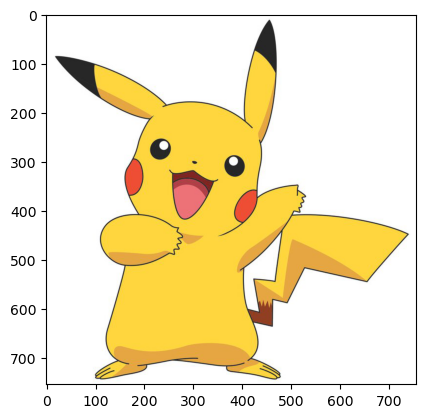

Pikachu


In [175]:
model_predict(r"./Data/simple_images/Pikachu/Pikachu_1.jpeg")

In [179]:
# Use Pokemon Traing Card Game (TCG) API fo find and store all card information containing the name "pikachu"
pika_cards = Card.where(q='name:pikachu')
# This created a list of data that include links to pictures online from the Pokemon TCG
pika_cards[0].images.small

'https://images.pokemontcg.io/basep/1.png'

In [184]:
len(pika_cards)

129

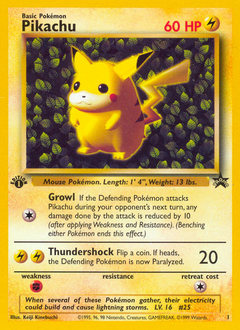

In [180]:
response1 = requests.get(pika_cards[0].images.small)
img1 = Image.open(BytesIO(response1.content))
img1

In [181]:
left = 30
right = 210
top = 37
bottom = 170

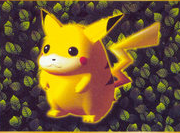

In [183]:
img1_crop = img1.crop((left, top, right, bottom))
img1_crop

In [192]:
def model_predict_tcg(http_path, left, right, top, bottom):
    response = requests.get(http_path)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img_crop = img.crop((left, top, right, bottom))
    pred_class = np.argmax(model.predict((np.array(img_crop.resize((256,256)))/255).reshape(-1, 256, 256, 3)), axis=-1)
    poke_class = {value:key for key,value in train_image_gen.class_indices.items()}
    plt.imshow(img)
    plt.show()
    print(poke_class[pred_class[0]])    

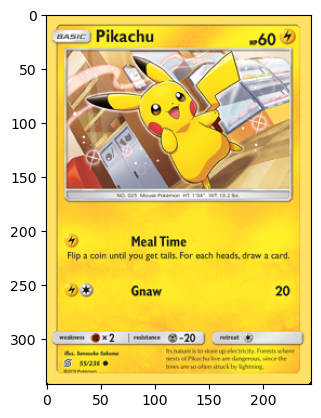

Pikachu


In [199]:
model_predict_tcg(pika_cards[41].images.small, left, right, top, bottom)

In [191]:
pika_cards[1].images.small

'https://images.pokemontcg.io/mcd19/6.png'

In [206]:
pika_cards[0]

Card(abilities=None, artist='Keiji Kinebuchi', ancientTrait=None, attacks=[Attack(name='Growl', cost=['Colorless'], convertedEnergyCost=1, damage='', text="If the Defending Pokémon attacks Pikachu during your opponent's next turn, any damage done by the attack is reduced by 10 (after applying Weakness and Resistance). (Benching either Pokémon ends this effect.)"), Attack(name='Thundershock', cost=['Lightning', 'Lightning'], convertedEnergyCost=2, damage='20', text='Flip a coin. If heads, the Defending Pokémon is now Paralyzed.')], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/basep-1', updatedAt='2021/11/28', prices=CardmarketPrices(averageSellPrice=6.15, lowPrice=1.5, trendPrice=5.92, germanProLow=None, suggestedPrice=None, reverseHoloSell=None, reverseHoloLow=None, reverseHoloTrend=16.32, lowPriceExPlus=5.0, avg1=7.0, avg7=5.81, avg30=7.26, reverseHoloAvg1=12.0, reverseHoloAvg7=12.83, reverseHoloAvg30=12.83)), convertedRetreatCost=1, evolvesFrom=None, flavorText=

In [207]:
len(pika_cards)

129

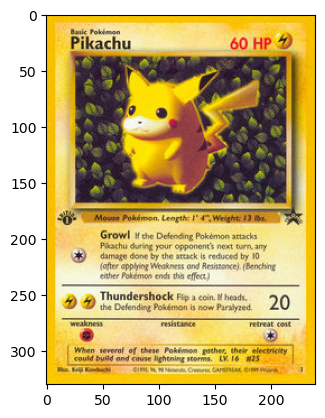

Kadabra


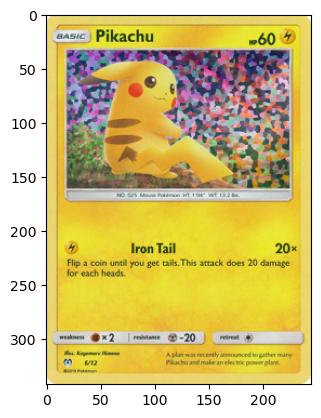

Moltres


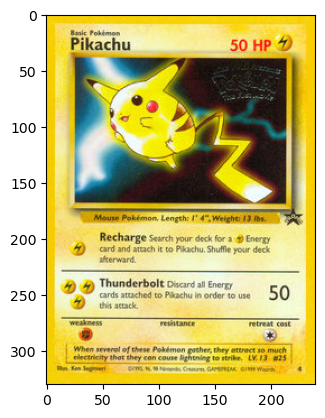

Hypno


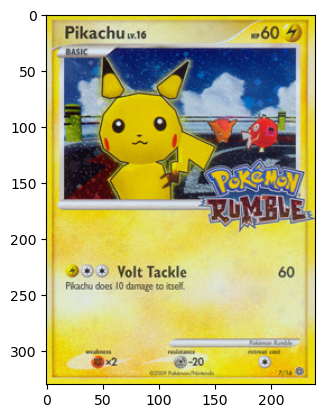

Hypno


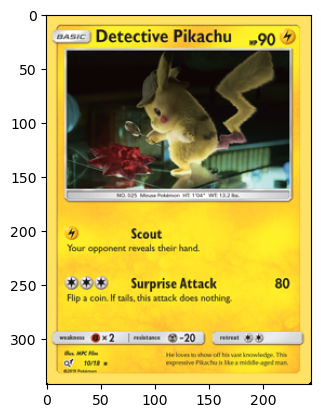

Raichu


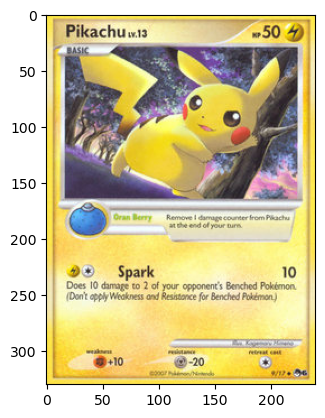

Hypno


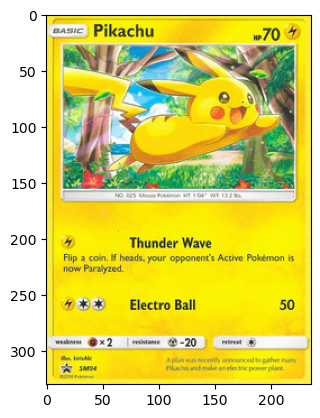

Pikachu


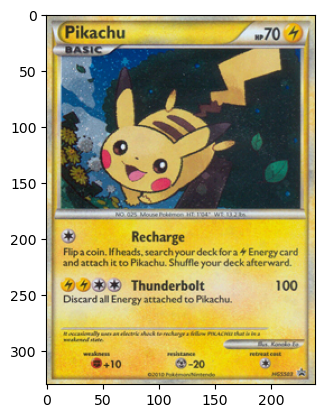

Raichu


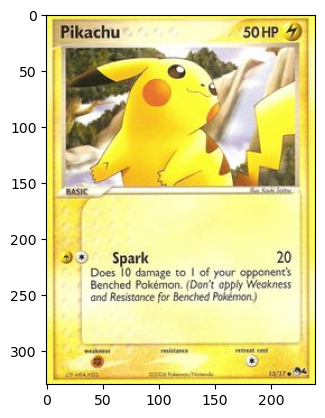

Pikachu


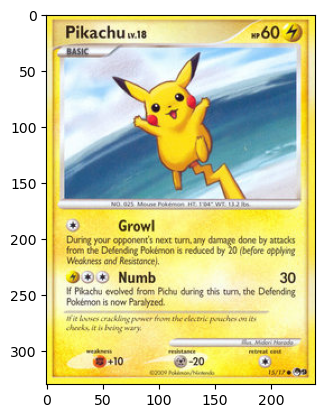

Beedrill


In [208]:
for i in range(10):
    model_predict_tcg(pika_cards[i].images.small, left, right, top, bottom)

create test_tcg same structure as test but with tcg card images (need a way to dl tcg card images algorithmically)

In [216]:
os.system("mkdir Data\\PokemonData\\Poke_test_tcg")

0

make poketest dir, 

In [274]:
os.system("cp -a Data\\PokemonData\\Poke_train\\. Data\\PokemonData\\Poke_test_tcg\\")

0

copy from poketrian to toke train tcg as well

In [275]:
os.system("find Data\PokemonData\Poke_test_tcg\ -name '*.*' -type f -delete")

0

In [332]:
os.system("find Data\PokemonData\Poke_train_tcg\ -name '*.*' -type f -delete")

0

In [276]:
classes

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 'Meowth',
 'Metapod',


In [ ]:
pika_cards = Card.where(q='name:pikachu')
pika_cards[1].images.small
urllib.urlretrieve("http://www.digimouth.com/news/media/2011/09/google-logo.jpg", "local-filename.jpg")

In [325]:
pika_cards[1].images

CardImage(small='https://images.pokemontcg.io/mcd19/6.png', large='https://images.pokemontcg.io/mcd19/6_hires.png')

In [344]:
classes[87]

'Nidoqueen'

In [349]:
Card.where(q='name:nidoran')[1].images.small

'https://images.pokemontcg.io/bw9/40.png'

In [348]:
classes[90:]

['Nidorina',
 'Nidorino',
 'Ninetales',
 'Oddish',
 'Omanyte',
 'Omastar',
 'Onix',
 'Paras',
 'Parasect',
 'Persian',
 'Pidgeot',
 'Pidgeotto',
 'Pidgey',
 'Pikachu',
 'Pinsir',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Ponyta',
 'Porygon',
 'Primeape',
 'Psyduck',
 'Raichu',
 'Rapidash',
 'Raticate',
 'Rattata',
 'Rhydon',
 'Rhyhorn',
 'Sandshrew',
 'Sandslash',
 'Scyther',
 'Seadra',
 'Seaking',
 'Seel',
 'Shellder',
 'Slowbro',
 'Slowpoke',
 'Snorlax',
 'Spearow',
 'Squirtle',
 'Starmie',
 'Staryu',
 'Tangela',
 'Tauros',
 'Tentacool',
 'Tentacruel',
 'Vaporeon',
 'Venomoth',
 'Venonat',
 'Venusaur',
 'Victreebel',
 'Vileplume',
 'Voltorb',
 'Vulpix',
 'Wartortle',
 'Weedle',
 'Weepinbell',
 'Weezing',
 'Wigglytuff',
 'Zapdos',
 'Zubat']

In [333]:
def tcg_data(pkmn_list):
    for pkmn in pkmn_list:
        counter = 1
        for card in Card.where(q='name:' + pkmn.lower()):
            r = requests.get(card.images.small).content
            with open(f"Data/PokemonData/Poke_train_tcg/{pkmn}-pic-{counter}.png", "wb+") as f:
                f.write(r)
                f.close()
            counter += 1

In [ ]:
classes[90:]

In [351]:
tcg_data(classes[90:])

nidoran and farfetch cards images need to be downloaded seperatly as the symbols mess things up.

In [353]:
os.system("mv Data/PokemonData/Poke_train_tcg/Abra* Data/PokemonData/Poke_train_tcg/Abra")

1

In [354]:
classes[88]

'Nidoran♀'

In [355]:
for i in range(88):
    os.system(f"mv Data/PokemonData/Poke_train_tcg/{classes[i]}* Data/PokemonData/Poke_train_tcg/{classes[i]}")

In [356]:
for i in range(90, len(classes)):
    os.system(f"mv Data/PokemonData/Poke_train_tcg/{classes[i]}* Data/PokemonData/Poke_train_tcg/{classes[i]}")

move nidorans manually

In [370]:
Card.where(q="name:farfetch'd")[0].images.small

'https://images.pokemontcg.io/hgss1/19.png'

In [374]:
counter = 1
for card in Card.where(q="name:farfetch'd"):
    r = requests.get(card.images.small).content
    with open(f"Data/PokemonData/Poke_train_tcg/Farfetchd/Farfetchd-pic-{counter}.png", "wb+") as f:
         f.write(r)
         f.close()
    counter += 1

In [378]:
counter = 1
for card in Card.where(q="name:mewtwo"):
    r = requests.get(card.images.small).content
    with open(f"Data/PokemonData/Poke_train_tcg/Mewtwo/Mewtwo-pic-{counter}.png", "wb+") as f:
         f.write(r)
         f.close()
    counter += 1

In [391]:
Card.where(q="name:mr")[21].images.small

'https://images.pokemontcg.io/xy10/67.png'

In [392]:
counter = 1
for card in Card.where(q="name:mr"):
    r = requests.get(card.images.small).content
    with open(f"Data/PokemonData/Poke_train_tcg/MrMime/MrMime-pic-{counter}.png", "wb+") as f:
         f.write(r)
         f.close()
    counter += 1

In [408]:
counter = 1
for card in Card.where(q="name:pidgeotto"):
    r = requests.get(card.images.small).content
    with open(f"Data/PokemonData/Poke_train_tcg/Pidgeotto/Pidgeotto-pic-{counter}.png", "wb+") as f:
         f.write(r)
         f.close()
    counter += 1

In [27]:
train_path_tcg = 'Data\PokemonData\Poke_train_tcg'
test_path_tcg = 'Data\PokemonData\Poke_test_tcg'

In [366]:
# Copying 15 random images from train folders to test folders

def prep_test_data_tcg(pokemon,train_path,test_path):
    pop = os.listdir(train_path+'/'+pokemon)
    test_data = random.sample(pop, 5)
    #print(test_data)
    
    for f in test_data:
        shutil.copy(train_path+'/'+pokemon+'/'+f,test_path+'/'+pokemon+'/')

In [406]:
os.listdir(train_path)[99:]

['Pidgeot',
 'Pidgeotto',
 'Pidgey',
 'Pikachu',
 'Pinsir',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Ponyta',
 'Porygon',
 'Primeape',
 'Psyduck',
 'Raichu',
 'Rapidash',
 'Raticate',
 'Rattata',
 'Rhydon',
 'Rhyhorn',
 'Sandshrew',
 'Sandslash',
 'Scyther',
 'Seadra',
 'Seaking',
 'Seel',
 'Shellder',
 'Slowbro',
 'Slowpoke',
 'Snorlax',
 'Spearow',
 'Squirtle',
 'Starmie',
 'Staryu',
 'Tangela',
 'Tauros',
 'Tentacool',
 'Tentacruel',
 'Vaporeon',
 'Venomoth',
 'Venonat',
 'Venusaur',
 'Victreebel',
 'Vileplume',
 'Voltorb',
 'Vulpix',
 'Wartortle',
 'Weedle',
 'Weepinbell',
 'Weezing',
 'Wigglytuff',
 'Zapdos',
 'Zubat']

In [ ]:
os.listdir(train_path+'/'+pokemon)

In [364]:
5/26

0.19230769230769232

In [409]:
for poke in os.listdir(train_path):
    prep_test_data_tcg(poke,train_path, test_path)

In [25]:
image_gen = ImageDataGenerator(rotation_range=20,
                               rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [28]:
image_gen.flow_from_directory(train_path)

NameError: name 'train_path' is not defined

In [418]:
image_gen.flow_from_directory(test_path)

Found 759 images belonging to 151 classes.


In [35]:
image_shape = (256,256,3)

In [419]:
model_tcg = Sequential()

model_tcg.add(Conv2D(64, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg.add(MaxPool2D((2,2)))

model_tcg.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg.add(MaxPool2D((2,2)))
model_tcg.add(Dropout(rate=0.25))
model_tcg.add(BatchNormalization())

model_tcg.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg.add(MaxPool2D((2,2)))

model_tcg.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg.add(MaxPool2D((2,2)))
model_tcg.add(BatchNormalization())

model_tcg.add(Conv2D(256, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg.add(MaxPool2D((2,2)))
model_tcg.add(Dropout(0.25))

model_tcg.add(Flatten())

model_tcg.add(Dense(1024, activation='relu'))
model_tcg.add(Dropout(0.25))

model_tcg.add(Dense(512,activation='relu'))
model_tcg.add(Dense(151,activation='softmax'))

model_tcg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
batch_size = 16

In [421]:
train_image_gen_tcg = image_gen.flow_from_directory(train_path_tcg,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 3784 images belonging to 151 classes.


In [422]:
test_image_gen_tcg = image_gen.flow_from_directory(test_path_tcg,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 759 images belonging to 151 classes.


In [33]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [424]:
history_tcg = model_tcg.fit(train_image_gen_tcg, epochs=30, validation_data=test_image_gen_tcg)

Epoch 1/80
237/237 [==============================] - 317s 1s/step - loss: 5.0941 - accuracy: 0.0410 - val_loss: 5.7821 - val_accuracy: 0.0119
Epoch 2/80
237/237 [==============================] - 322s 1s/step - loss: 4.4134 - accuracy: 0.0550 - val_loss: 4.7677 - val_accuracy: 0.0290
Epoch 3/80
237/237 [==============================] - 308s 1s/step - loss: 4.0025 - accuracy: 0.0777 - val_loss: 3.9683 - val_accuracy: 0.0329
Epoch 4/80
237/237 [==============================] - 317s 1s/step - loss: 3.7571 - accuracy: 0.1002 - val_loss: 6.2488 - val_accuracy: 0.0132
Epoch 5/80
237/237 [==============================] - 325s 1s/step - loss: 3.5259 - accuracy: 0.1107 - val_loss: 3.6045 - val_accuracy: 0.0817
Epoch 6/80
237/237 [==============================] - 325s 1s/step - loss: 3.3555 - accuracy: 0.1261 - val_loss: 3.5436 - val_accuracy: 0.0856
Epoch 7/80
237/237 [==============================] - 318s 1s/step - loss: 3.2453 - accuracy: 0.1327 - val_loss: 3.3073 - val_accuracy: 0.1186

In [ ]:
model.save('poke_cnn_model.h5')

In [425]:
model_tcg.evaluate(test_image_gen_tcg)

48/48 [==============================] - 16s 339ms/step - loss: 2.6733 - accuracy: 0.2490


[2.673314332962036, 0.24901185929775238]

In [486]:
model.evaluate(train_image_gen_tcg_crop)

237/237 [==============================] - 95s 399ms/step - loss: 6.6747 - accuracy: 0.0483


[6.674709796905518, 0.048310454934835434]

In [73]:
# not algorithmically correct, should be done in terms of proportions
def crop(img):

    left = 30
    right = 210
    top = 37
    bottom = 170
    imgc = Image.fromarray(img)
    imgc = imgc.crop((left, top, right, bottom))
    return np.array(image)

In [74]:
image_gen_crop = ImageDataGenerator(rotation_range=20,
                               rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               preprocessing_function=crop)

In [75]:
train_image_gen_tcg_crop = image_gen_crop.flow_from_directory(train_path_tcg,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 3788 images belonging to 151 classes.


In [76]:
test_image_gen_tcg_crop = image_gen_crop.flow_from_directory(test_path_tcg,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 759 images belonging to 151 classes.


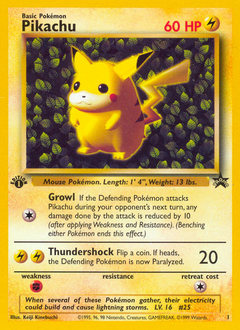

In [60]:
img1

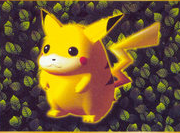

In [63]:
crop(img1)

In [ ]:
def crop(img):
    left = 30
    right = 210
    top = 37
    right = 170

In [ ]:
left = 30
right = 210
top = 37
bottom = 170

imc = img1.crop((left, top, right, bottom))

In [430]:
img1.size

(240, 330)

In [437]:
width, length = img1.size

In [440]:
330/37

8.91891891891892

In [441]:
330/170

1.9411764705882353

In [ ]:
left1 = 1/8*width
right1 = 7/8*width
top1 = 1/8.92*length
bottom1 = 1/1.94*length

In [443]:
240/30

8.0

In [445]:
330/170

1.9411764705882353

Image augmentation more data, Transfer learning(train more based on own data)

In [38]:
model_tcg2 = Sequential()

model_tcg2.add(Conv2D(64, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg2.add(MaxPool2D((2,2)))

model_tcg2.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg2.add(MaxPool2D((2,2)))
model_tcg2.add(Dropout(rate=0.25))
model_tcg2.add(BatchNormalization())

model_tcg2.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg2.add(MaxPool2D((2,2)))

model_tcg2.add(Conv2D(128, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg2.add(MaxPool2D((2,2)))
model_tcg2.add(BatchNormalization())

model_tcg2.add(Conv2D(256, (3,3), padding='same', input_shape=image_shape, activation='relu'))
model_tcg2.add(MaxPool2D((2,2)))
model_tcg2.add(Dropout(0.25))

model_tcg2.add(Flatten())

model_tcg2.add(Dense(1024, activation='relu'))
model_tcg2.add(Dropout(0.25))

model_tcg2.add(Dense(512,activation='relu'))
model_tcg2.add(Dense(151,activation='softmax'))

model_tcg2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
history_tcg2 = model_tcg2.fit(train_image_gen_tcg_crop, epochs=7, validation_data=test_image_gen_tcg_crop)

TypeError: Cannot handle this data type: (1, 1, 3), <f4

In [499]:
model_tcg2.evaluate(test_image_gen_tcg_crop)

48/48 [==============================] - 18s 365ms/step - loss: 1.3323 - accuracy: 0.5876


[1.3323308229446411, 0.5876153111457825]

In [502]:
model_tcg2.evaluate(test_image_gen_tcg_crop)

48/48 [==============================] - 19s 382ms/step - loss: 1.2451 - accuracy: 0.5955


[1.2451066970825195, 0.5955204367637634]

In [500]:
model_tcg2.save('poke_tcg_model.h5')

In [ ]:
data viz ideas

edge detection (2 bookmarks), semi-transparent images (2 bookmarks)

Pokémon TCG Card Dex already has this feature

Let’s see what transfer learning is first. Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. Another crucial application of transfer learning is when the dataset is small, by using a pre-trained model on similar images we can easily achieve high performance. Since our problem statement is a good fit for transfer learning lets see how we can go about implementing a pre-trained model and what accuracy we are able to achieve.

Step 1:- Import the model

transfer learning models <br> 
- VGG-16
- ResNet50
- Inceptionv3
- EfficientNet

In [503]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [519]:
# load model
model_vgg = VGG16(include_top=False, input_shape=image_shape)

58900480/58889256 [==============================] - 8s 0us/step


In [508]:
# summarize the model
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [520]:
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [521]:
history_vgg = model_vgg.fit(train_image_gen_tcg_crop, epochs=20, validation_data=test_image_gen_tcg_crop)

Epoch 1/20


ValueError: in user code:

    C:\Users\marcj\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\marcj\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\marcj\anaconda3\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\marcj\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, None) and (None, 8, 8, 512) are incompatible


In [ ]:
from tensorflow.keras.models import Model
vgg_model = VGG16(include_top=False, input_shape=image_shape)

#for layer in vgg_model.layers:
#    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(151, activation='softmax')(class1)

model_f = Model(inputs = vgg_model.inputs, outputs = output)

In [541]:
model_f.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_f.fit(train_image_gen_tcg_crop, validation_data = test_image_gen_tcg_crop, epochs=10)

Epoch 1/10
237/237 [==============================] - 1658s 7s/step - loss: 0.0400 - accuracy: 0.0301 - val_loss: 0.0412 - val_accuracy: 0.0066
Epoch 2/10
130/237 [===============>..............] - ETA: 12:14 - loss: 0.0398 - accuracy: 0.0312

KeyboardInterrupt: 

In [542]:
v3 = InceptionV3(include_top=False, input_shape=image_shape)

87924736/87910968 [==============================] - 12s 0us/step


In [545]:
model4 = Sequential()
model4.add(v3)

model4.add(Conv2D(16, (3, 3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(151, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [548]:
history4 = model4.fit(train_image_gen_tcg_crop, validation_data = test_image_gen_tcg_crop, epochs=10)

Epoch 1/10
237/237 [==============================] - 679s 3s/step - loss: 3.2053 - accuracy: 0.1476 - val_loss: 3.2291 - val_accuracy: 0.1094
Epoch 2/10
237/237 [==============================] - 695s 3s/step - loss: 3.1916 - accuracy: 0.1534 - val_loss: 3.3788 - val_accuracy: 0.1041
Epoch 3/10
237/237 [==============================] - 651s 3s/step - loss: 3.1198 - accuracy: 0.1626 - val_loss: 3.1512 - val_accuracy: 0.1133
Epoch 4/10
237/237 [==============================] - 632s 3s/step - loss: 3.0555 - accuracy: 0.1605 - val_loss: 3.0883 - val_accuracy: 0.1410
Epoch 5/10
237/237 [==============================] - 651s 3s/step - loss: 3.0271 - accuracy: 0.1645 - val_loss: 3.0516 - val_accuracy: 0.1370
Epoch 6/10
187/237 [======================>.......] - ETA: 2:12 - loss: 3.0186 - accuracy: 0.1671

KeyboardInterrupt: 

In [79]:
type(img1)

PIL.PngImagePlugin.PngImageFile

In [549]:
# credit for code goes to Subhodeep Maji and IronWaffleman on OVerstack
# https://stackoverflow.com/questions/43368565/how-to-find-the-coordinates-of-a-contour-and-crop-it
# https://stackoverflow.com/questions/43009923/how-to-complete-close-a-contour-in-python-opencv
frame = cv2.imread('butterfree-tcg2.jpg')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (5,5))
gray = cv2.bilateralFilter(gray, 11, 17, 17) #blur. very CPU intensive.
cv2.imshow("Gray map", gray)

edges = cv2.Canny(gray, 30, 120)


#find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
# use RETR_EXTERNAL since we know the largest (external) contour will be the card edge.
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(edges, kernel)
cnts, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:1]
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.3 * peri, True)

    cv2.drawContours(frame, [cnts[0]], -1, (0, 255, 0), 2)

    # if our approximated contour has four points, then
    # we can assume that we have found our card
    if len(approx) == 4:
        screenCnt = approx;
    break
    
largestContourArea = 0
largestContour = 0
for c in cnts:
    contourArea = cv2.contourArea(c)
    if( contourArea > largestContourArea):
        largestContour = c
        largestContourArea = contourArea

# This finds the bounding rectangle
# x,y are the co-ordinates of left-top point and w,h are width and height respectively
x,y,w,h = cv2.boundingRect(largestContour)

# This is simple slicing to get the "Region of Interest"
ROI = frame[y:y+h,x:x+w]
plt.imshow(ROI)
plt.show()

NameError: name 'cv2' is not defined

4 things needed.

- 3-4 data viz's <br>
(pics of cards and pokemons) <br>
(number of poke samples for pics and cards train, needed for NULL MODEL!!) <br>
(train/vall accuracy and loss) <br>
(vis of model?) <br>
(random image transformations) <br>
(graph showing which pokemon identified correctly more often)  <br>
- streamlit
- transfer learning? (graph of all techniques and results)

In [9]:
#number of samples for null model
sample_list_1 = []
sample_list_2 = []
for i in range(len(os.listdir(f"{path}"))):
    sample_list_1.append(classes[i])
    sample_list_2.append(len(os.listdir(f"{path}/{classes[i]}")))

sample_dict = dict(zip(sample_list_1, sample_list_2))

In [565]:
sample_dict

{'Abra': 35,
 'Aerodactyl': 35,
 'Alakazam': 26,
 'Arbok': 41,
 'Arcanine': 41,
 'Articuno': 45,
 'Beedrill': 34,
 'Bellsprout': 40,
 'Blastoise': 42,
 'Bulbasaur': 41,
 'Butterfree': 27,
 'Caterpie': 37,
 'Chansey': 43,
 'Charizard': 35,
 'Charmander': 51,
 'Charmeleon': 46,
 'Clefable': 38,
 'Clefairy': 46,
 'Cloyster': 49,
 'Cubone': 40,
 'Dewgong': 44,
 'Diglett': 39,
 'Ditto': 40,
 'Dodrio': 39,
 'Doduo': 35,
 'Dragonair': 42,
 'Dragonite': 48,
 'Dratini': 26,
 'Drowzee': 39,
 'Dugtrio': 51,
 'Eevee': 37,
 'Ekans': 36,
 'Electabuzz': 41,
 'Electrode': 51,
 'Exeggcute': 46,
 'Exeggutor': 52,
 'Farfetchd': 48,
 'Fearow': 48,
 'Flareon': 45,
 'Gastly': 44,
 'Gengar': 49,
 'Geodude': 35,
 'Gloom': 49,
 'Golbat': 48,
 'Goldeen': 47,
 'Golduck': 47,
 'Golem': 46,
 'Graveler': 40,
 'Grimer': 44,
 'Growlithe': 44,
 'Gyarados': 46,
 'Haunter': 48,
 'Hitmonchan': 47,
 'Hitmonlee': 48,
 'Horsea': 54,
 'Hypno': 47,
 'Ivysaur': 40,
 'Jigglypuff': 46,
 'Jolteon': 51,
 'Jynx': 49,
 'Kabuto': 49,

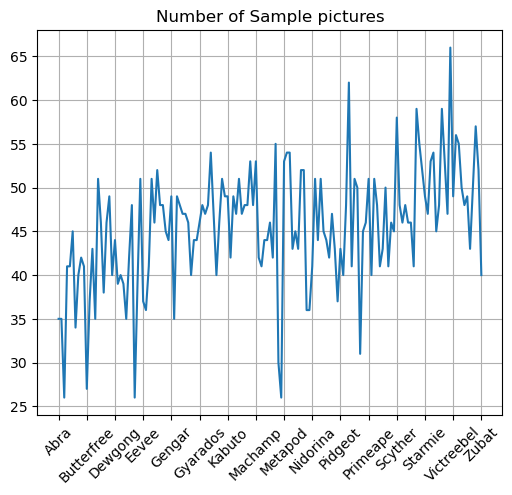

In [14]:
x = list(sample_dict.keys())
y = list(sample_dict.values())
plt.figure(figsize=(6,5))
plot = plt.plot(x, y)
plt.xticks(x[0::10], rotation=45)
plt.grid()
plt.title("Number of Sample pictures")
plt.show()

In [691]:
plt.plot(x, y)
plt.show()

<ipython-input-691-3572052619ce>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [590]:
top_5 = list(sample_dict.values())
top_5.sort(reverse=True)
top_5[:5]

[66, 62, 59, 59, 58]

In [597]:
[list(sample_dict.keys())[list(sample_dict.values()).index(i)] for i in top_5[:5]]

['Venusaur', 'Pikachu', 'Snorlax', 'Snorlax', 'Scyther']

In [598]:
# avg sample size
res = 0
for val in sample_dict.values():
    res += val
  
# using len() to get total keys for mean computation
res = res / len(sample_dict)
res

45.48344370860927

In [600]:
# Null Model success
66/sum(list(sample_dict.values()))*100

0.960978450786255

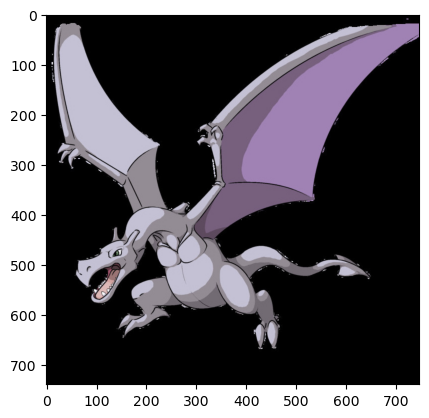

In [16]:
aero = plt.imread(f"{path}/{classes[1]}/0a15b831d1b947fda035aaf637c58215.jpg")
plt.imshow(aero)
plt.show()

In [56]:
aero.crop(1,2,3,4)

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

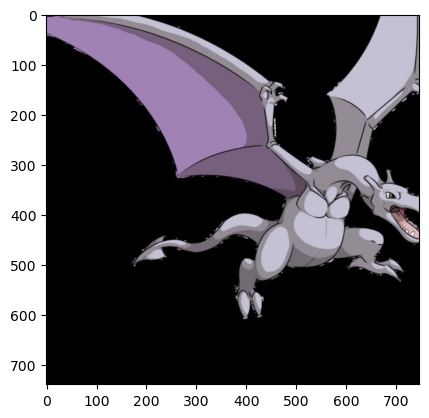

In [24]:
# Random Image transformation
plt.imshow(image_gen.random_transform(aero))
plt.show()

In [644]:
from sklearn.metrics import confusion_matrix

In [646]:
x_test, y_test = test_image_gen_tcg_crop.next()
x_train, y_train = train_image_gen_tcg_crop.next()

C:\Users\marcj\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [653]:
x_train.shape

(16, 256, 256, 3)

In [654]:
x_test.shape

(16, 256, 256, 3)

In [655]:
y_test.shape

(16, 151)

In [659]:
outputs.shape

(16, 151)

In [671]:
from sklearn.metrics import plot_confusion_matrix

In [661]:
outputs = model_tcg2.predict(x_test)

In [668]:
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(outputs, axis=1))

In [682]:
x_train, y_train = next(train_image_gen_tcg_crop)
x_test, y_test = next(test_image_gen_tcg_crop)
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model_tcg2.predict(x_test)
Y_pred = np.argmax(y_pred,axis=1)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          48       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         0
          59       0.00      0.00      0.00         1
          60       1.00      1.00      1.00         1
          62       1.00      1.00      1.00         1
          73       0.00      0.00      0.00         1
          80       1.00      1.00      1.00         1
          83       0.00      0.00      0.00         0
          86       0.00      0.00      0.00         1
         103       1.00      1.00      1.00         1
         110       1.00      1.00      1.00         1
         111       1.00      1.00      1.00         1
         113       0.00      0.00      0.00         1
         114       0.50      1.00      0.67         1
         119       0.00    

C:\Users\marcj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcj\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

In [ ]:
def indices(l, val):
   retval = []
   last = 0
   while val in l[last:]:
           i = l[last:].index(val)
           retval.append(last + i)
           last += i + 1   
   return retval
The function above will return the indices in the list l of a certain value val

def class_accuracy(y_pred, y_true, class):
    index = indices(l, class)
    y_pred, y_true = ypred[index], y_true[index]
    tp = [1 for k in range(len(y_pred)) if y_true[k]==y_pred[k]]
    tp = np.sum(tp)
    return tp/float(len(y_pred))

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=['Pikachu', 'Bulbasaur', 'Meowth'], title='Confusion Matrix')
